<a href="https://colab.research.google.com/github/anas1IA/Windows_attack10/blob/main/project/TON_IoT_Attack_Windows_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TON-IoT Attack Windows 10

In [68]:
# import important libraries :

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# !pip install skfeature-chappers
from skfeature.function.similarity_based import fisher_score

In [69]:
df = pd.read_csv("/content/Train_Test_Windows_10.csv")

## Understand the Dataset :

In [70]:
df.head(10)

,Unnamed: 0,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,...,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label,type
0,0,0,49.072449,0.0,0.779672,0.0,21.830814,49.072449,45.578899,405.210993,...,0.035544,0.035728,0.006139,9.807255e+05,61.120654,16125.91191,1.184789,0.000584,1,dos
1,1,17,0.000000,0.0,1.170523,0.0,38.159043,0.000000,100.000000,0.000000,...,0.071869,0.113429,1.389685,6.954375e+05,56.840424,17923.59930,2.403132,0.001996,1,dos
2,2,11,0.000000,0.0,0.546510,0.0,65.112770,0.000000,100.000000,0.000000,...,0.010272,0.023255,0.432791,6.913414e+05,9.388015,86462.63830,0.342387,0.002476,1,dos
3,3,0,0.000000,0.0,0.780817,0.0,68.946112,0.000000,100.000000,0.000000,...,0.062089,0.070302,0.273779,1.039903e+06,81.894394,13206.97436,2.069629,0.000859,1,dos
4,4,0,0.000000,0.0,0.468740,0.0,66.014212,0.000000,100.000000,0.000000,...,0.100304,0.123923,0.787313,2.498189e+06,190.171748,15214.36803,3.343468,0.000652,1,dos
5,5,0,0.000000,0.0,0.850671,0.0,72.307014,0.000000,100.000000,0.000000,...,0.004768,0.012070,0.243401,2.842706e+05,7.227313,42271.56164,0.158933,0.001670,1,dos
6,6,2,0.000000,0.0,1.718765,0.0,57.734880,0.000000,100.000000,0.000000,...,0.185050,0.287075,3.400819,2.605891e+06,340.002040,14482.07059,6.168343,0.000844,1,dos
7,7,1,0.000000,0.0,1.953685,0.0,53.218380,0.000000,100.000000,0.000000,...,0.270206,0.369339,3.304436,2.656635e+06,353.504917,12440.55688,9.006879,0.001045,1,dos
8,8,2,0.000000,0.0,1.642301,0.0,51.224136,0.000000,100.000000,0.000000,...,0.151404,0.197131,1.524221,1.319854e+06,198.002737,11618.87968,5.046812,0.000996,1,dos
9,9,5,0.000000,0.0,2.110520,0.0,52.762993,0.000000,100.000000,0.000000,...,0.198903,0.228857,0.998469,9.106225e+05,111.360080,11956.78706,6.630083,0.002055,1,dos


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21089 entries, 0 to 21088
Columns: 127 entries, Unnamed: 0 to type
dtypes: float64(74), int64(52), object(1)
memory usage: 20.4+ MB


In [72]:
df["type"].value_counts()

normal       10000
ddos          4608
password      3628
xss           1269
injection      612
dos            525
scanning       447
Name: type, dtype: int64

In [73]:
df.describe()

,Unnamed: 0,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,...,LogicalDisk(_Total) Avg Disk Bytes Read,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label
count,21089.000000,21089.000000,21084.000000,21084.0,21084.000000,21084.0,21084.000000,21084.000000,21084.000000,21084.000000,...,21084.000000,21084.000000,21084.000000,21084.000000,2.108400e+04,21084.000000,21084.000000,21084.000000,21084.000000,21089.000000
mean,10544.000000,5.252122,68.868908,0.0,0.228063,0.0,18.680977,68.868908,28.484833,517.198631,...,16470.773339,0.030374,0.139398,4.482725,1.299299e+06,199.006315,27288.612334,2.573758,0.000737,0.525819
std,6088.014249,16.792006,20.217399,0.0,0.426904,0.0,14.086853,20.217399,20.146982,798.078247,...,25988.207795,0.131428,0.413220,15.199438,3.631419e+06,626.770766,56621.093936,12.982989,0.001143,0.499345
min,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5272.000000,0.000000,60.516044,0.0,0.000000,0.0,7.421634,60.516044,12.946935,151.904430,...,0.000000,0.000388,0.000479,0.000000,1.175766e+04,0.899961,11549.820788,0.013042,0.000304,0.000000
50%,10544.000000,0.000000,72.014364,0.0,0.078130,0.0,15.390606,72.014364,25.625958,289.850030,...,9443.974557,0.001201,0.001887,0.002465,3.941085e+04,3.700120,16384.000000,0.041111,0.000437,1.000000
75%,15816.000000,2.000000,84.505423,0.0,0.312476,0.0,25.430240,84.505423,36.247211,416.363178,...,25600.000000,0.005427,0.008968,0.064660,2.407928e+05,20.131314,24576.000000,0.189118,0.000702,1.000000
max,21088.000000,195.000000,99.638956,0.0,10.641964,0.0,91.566420,99.638956,100.000000,10318.521390,...,944383.062300,1.836753,4.236590,294.529448,6.393745e+07,5968.067353,977715.200000,183.675284,0.045244,1.000000


#### convert to numeric values :
while exploring data we find that the feature `object` type are numerical values except the `target` is string format. so, let's convert all `object`features to numerical values :

In [74]:
df[df.columns[:-1]] = df[df.columns[:-1]].apply(pd.to_numeric, errors='coerce')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21089 entries, 0 to 21088
Columns: 127 entries, Unnamed: 0 to type
dtypes: float64(74), int64(52), object(1)
memory usage: 20.4+ MB


In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()
dfs = pd.DataFrame(scaler.fit_transform(df[df.columns[:-1]]), columns=df.columns[:-1])

In [78]:
dfs[df.columns[-1]] = df[df.columns[-1]]

In [79]:
def correlation(dataset, threshold):
    col_corr = set()
    # corr_matrix = dataset.corr()
    # for i in range(len(corr_matrix.columns)):
    #     for j in range(i):
    #         if abs(corr_matrix.iloc[i, j])> threshold:
    #             colname = corr_matrix.columns[i]
    #             col_corr.add(colname)

    for i in range(len(dataset.columns)):
      colname = dataset.columns[i]
      if len(dataset[colname].unique()) <= 2:
        col_corr.add(colname)
    return list(col_corr)

In [80]:
# @title Remove The Non important Features :

In [81]:
def noneImportantFeatures(dataset):
  nonUseFul = set()
  for i in range(len(dataset.columns)):
    colname = dataset.columns[i]
    if len(dataset[colname].unique()) <= 2:
      nonUseFul.add(colname)

  return list(nonUseFul)

In [82]:
dfs = dfs.drop(columns=noneImportantFeatures(dfs))

The only object feture is the `type` feature.

### Exploratory Data Analysis (EDA):

### Data visualization :

#### Missing Values :

As we see the following plot gives as the ideas of present missing values :

<Axes: >

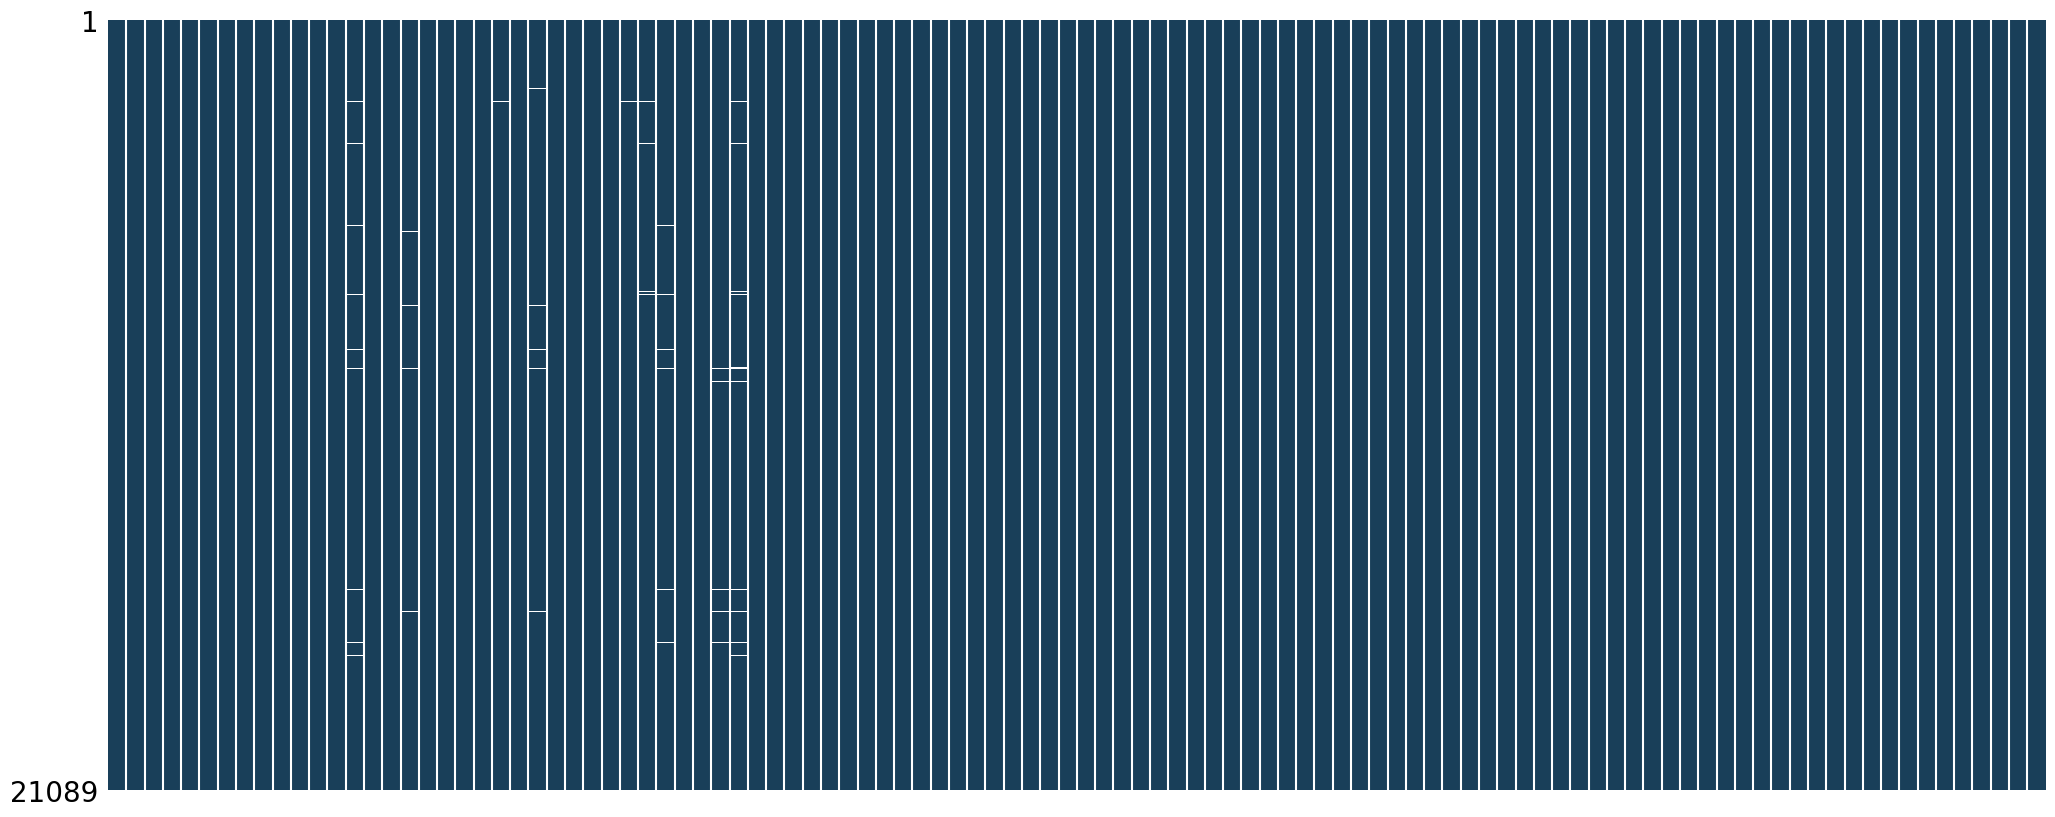

In [83]:
msno.matrix(dfs, sparkline=False, color=(0.1, 0.25, 0.35))

So, we observe that the missing values are located before the feature of index 50 :  

<Axes: >

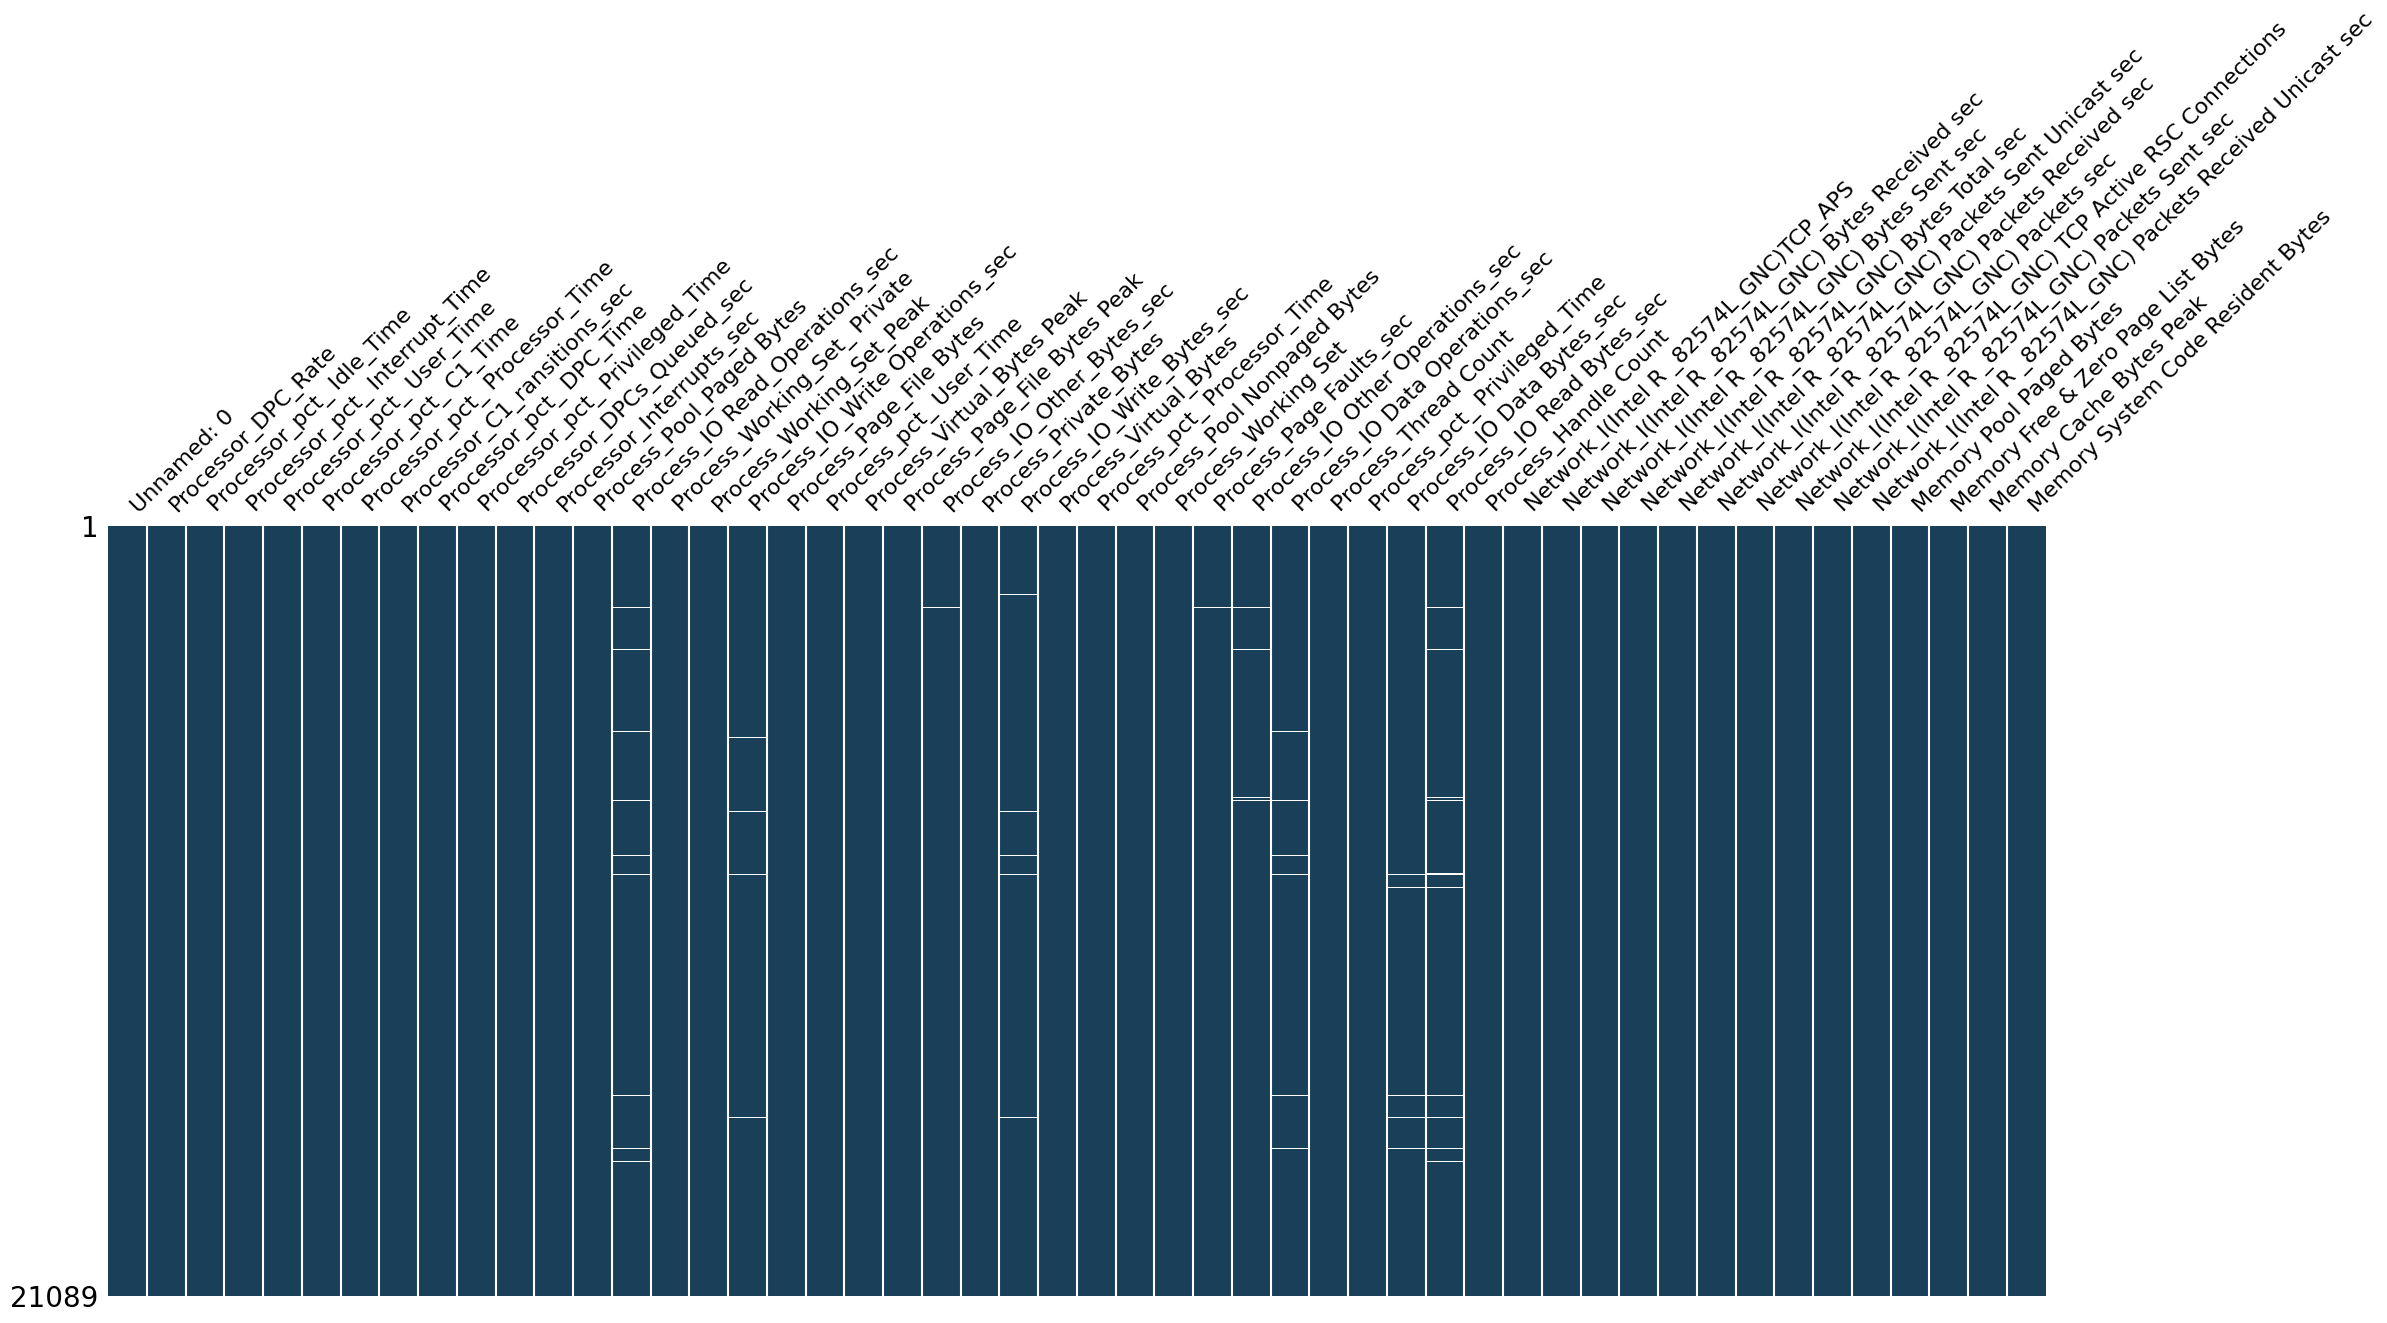

In [84]:
msno.matrix(dfs.iloc[:, 0:50], sparkline=False, color=(0.1, 0.25, 0.35))

### Conclusions :
As this figure shows, There a lot of features that have missing values.

### Outliers :

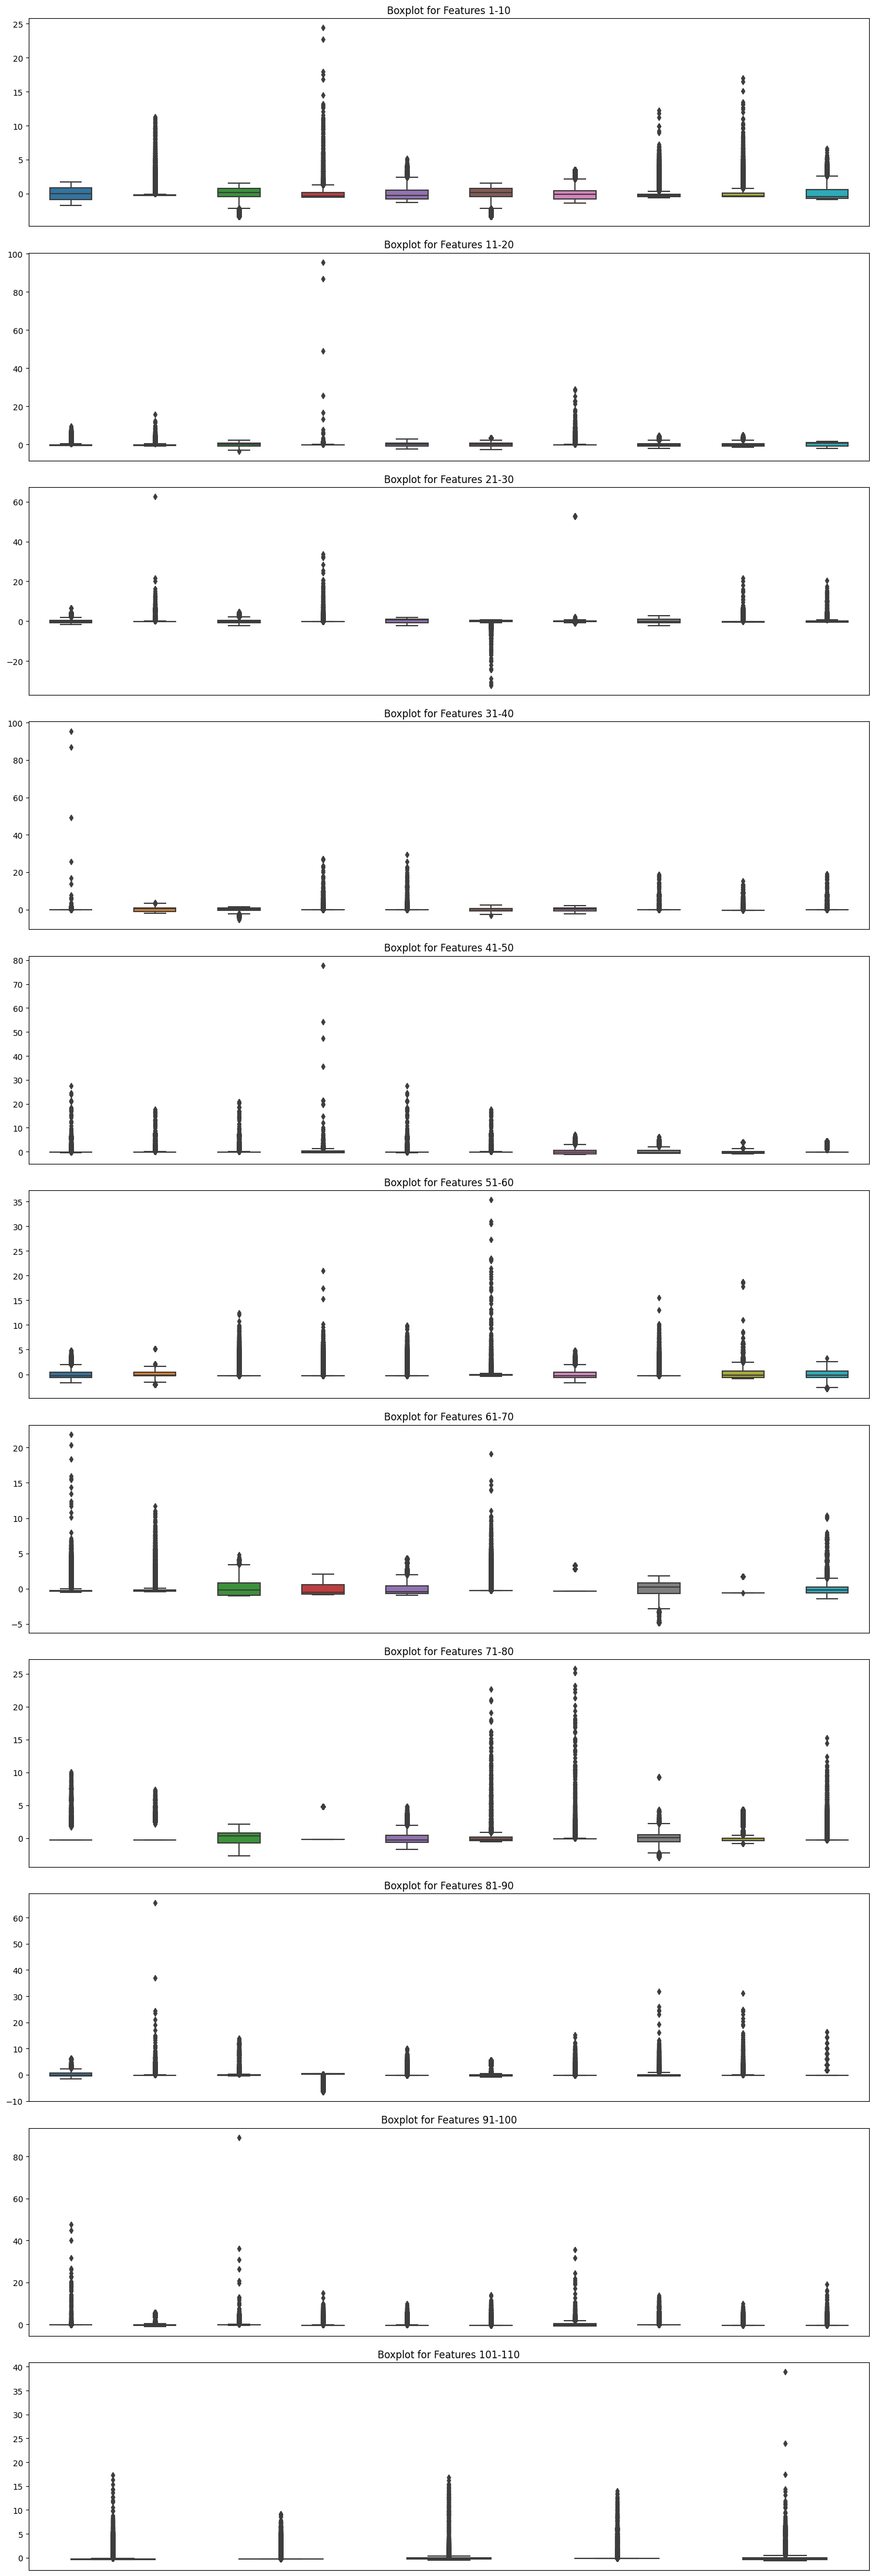

In [85]:
num_features = len(dfs.columns[:-1])
num_plots = 10

num_subplots = num_features // num_plots + (num_features % num_plots > 0)

plt.figure(figsize=(15, 4 * num_subplots))

for i in range(num_subplots):
    start_idx = i * num_plots
    end_idx = (i + 1) * num_plots

    plt.subplot(num_subplots, 1, i + 1)

    sns.boxplot(data=dfs.iloc[:, start_idx:end_idx], width=0.5)

    plt.xticks([])
    plt.title(f'Boxplot for Features {start_idx + 1}-{end_idx}')

plt.tight_layout()
plt.show()


> ### Conclusions :  
> As you see most of features have outliers, so the section of data cleaning and preprocessing we will deal remove them.

#### Corolations Matrix :  

<ipython-input-86-cb0a38471f41>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfs.corr())


<Axes: >

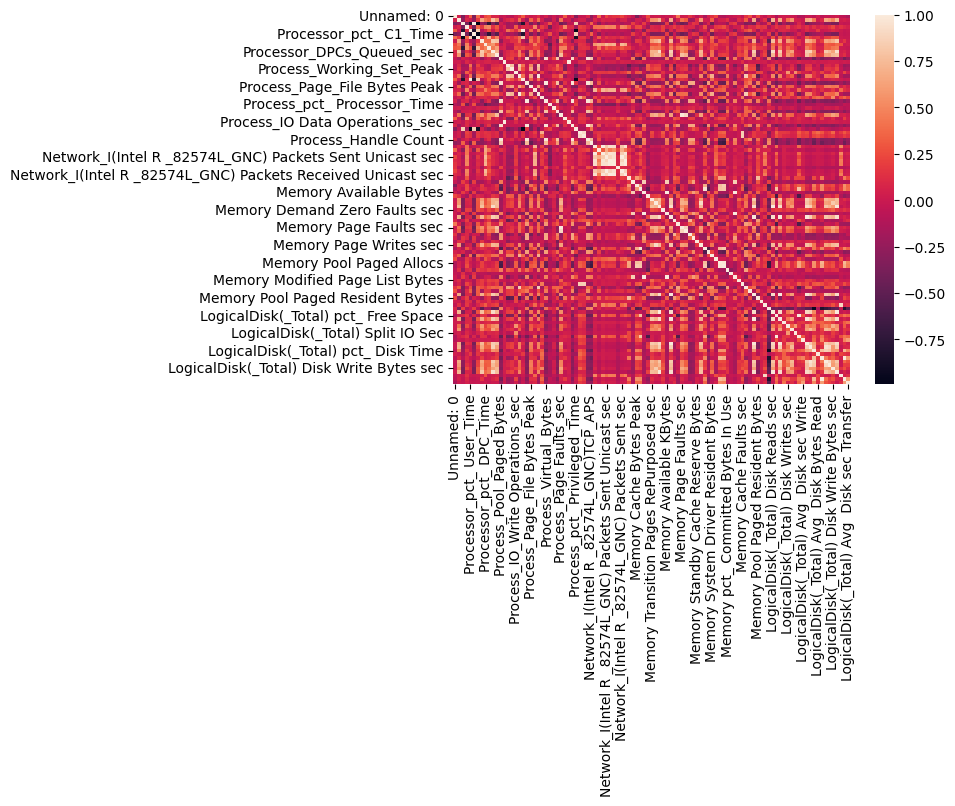

In [86]:
sns.heatmap(dfs.corr())

> ### Conclusions :
> As we can see, the Corolation matrix shows that there is a lot of corrolaions relationship between features.

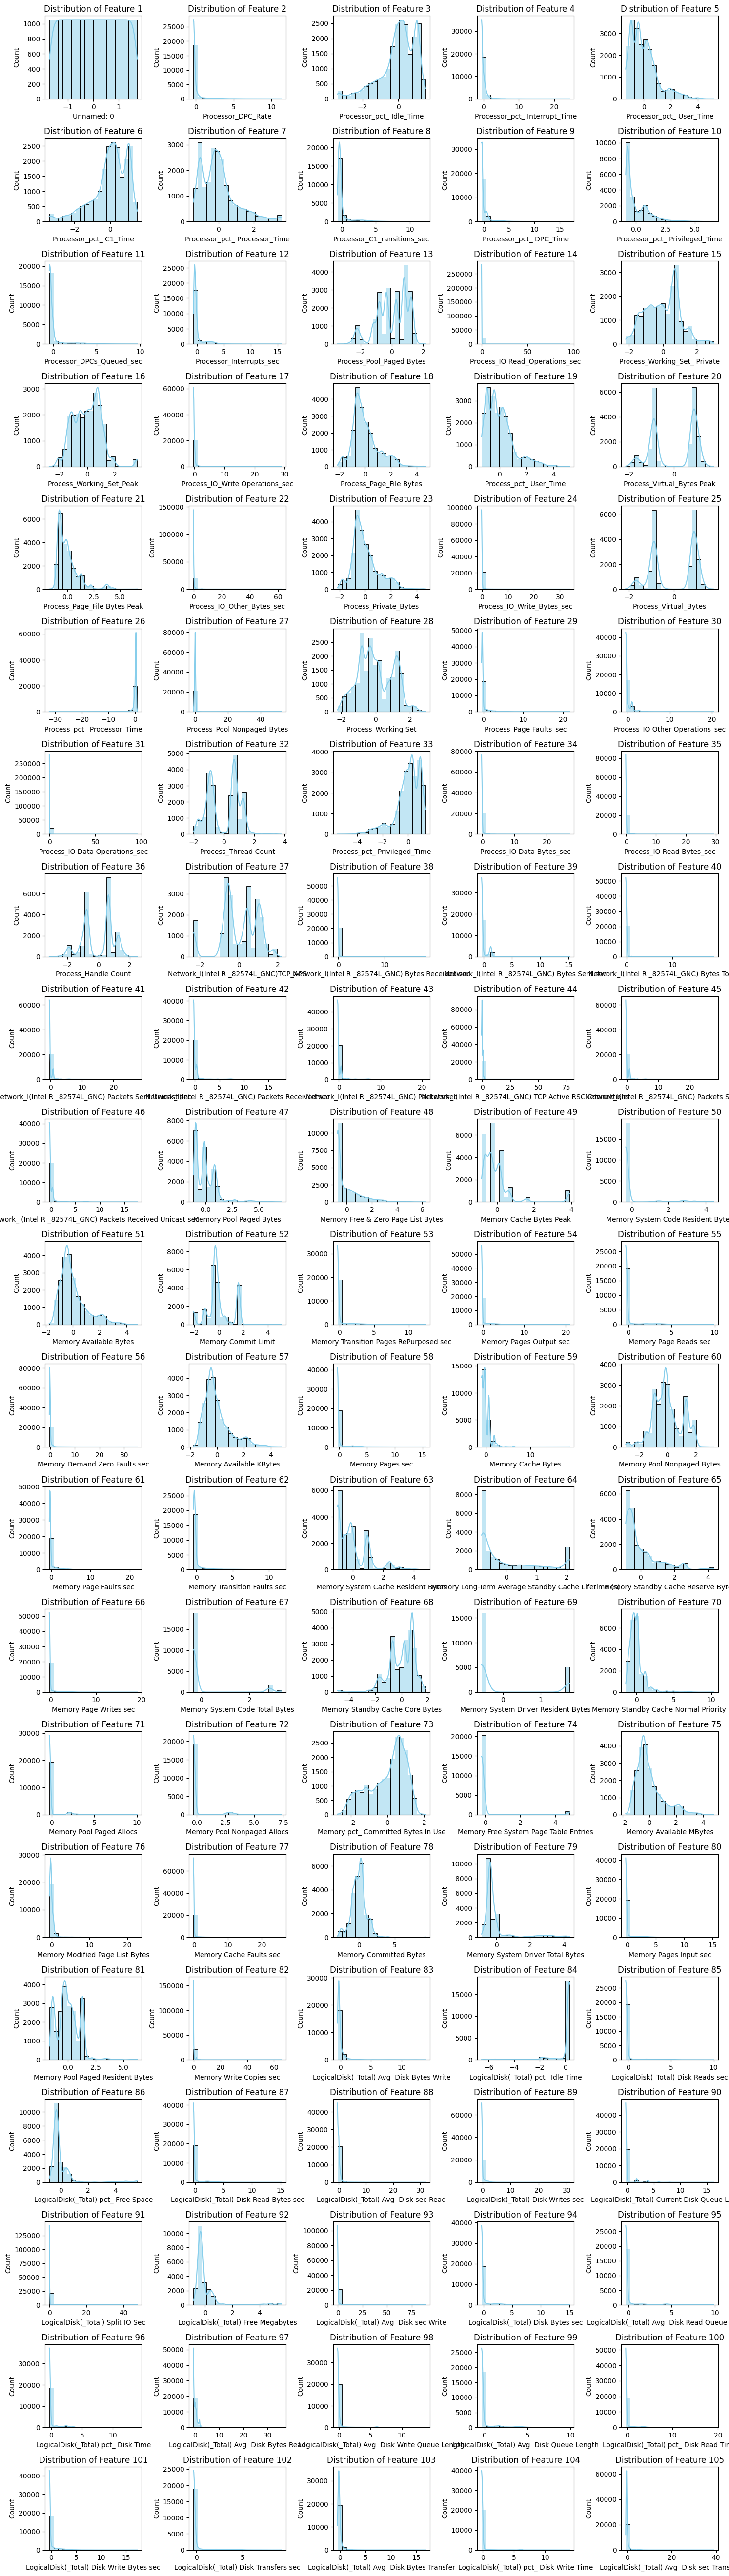

In [87]:
# @title Plot The distribution for all features :

num_features = len(dfs.columns[:-1])

plt.figure(figsize=(15, ((num_features+10)//10)*5))

for i in range(num_features):
    plt.subplot((num_features+5)//5, 5, i + 1)

    sns.histplot(dfs.iloc[:, i], kde=True, bins=20, color='skyblue')

    plt.title(f'Distribution of Feature {i + 1}')

plt.tight_layout()

plt.show()

## Data Cleaning and Preprocessing :



### Handling outliers :

In [88]:
def rm_outliers_of(df_, col, threshold=0.90):
  upper_limit = df_.iloc[:, col].quantile(threshold)
  lower_limit = df_.iloc[:, col].quantile(1-threshold)
  return df_.loc[(df_.iloc[:, col] <= upper_limit) & (df_.iloc[:, col] >= lower_limit)]

In [89]:
dfout = dfs.copy()
for i in range(len(dfout.columns[:-1])):
  dfout = rm_outliers_of(dfout, i , 0.98)

In [90]:
def rm_stdlow_of(df_, col, threshold=0.1):
  if df_.iloc[:, col].describe()["std"] < threshold:
    df_ = df_.drop(columns=[df_.columns[col]])
  return df_

In [91]:
for i in range(len(dfout.columns[:-1])):
  try:
    dfout = rm_stdlow_of(dfout, i , 0.01)
  except:
    pass

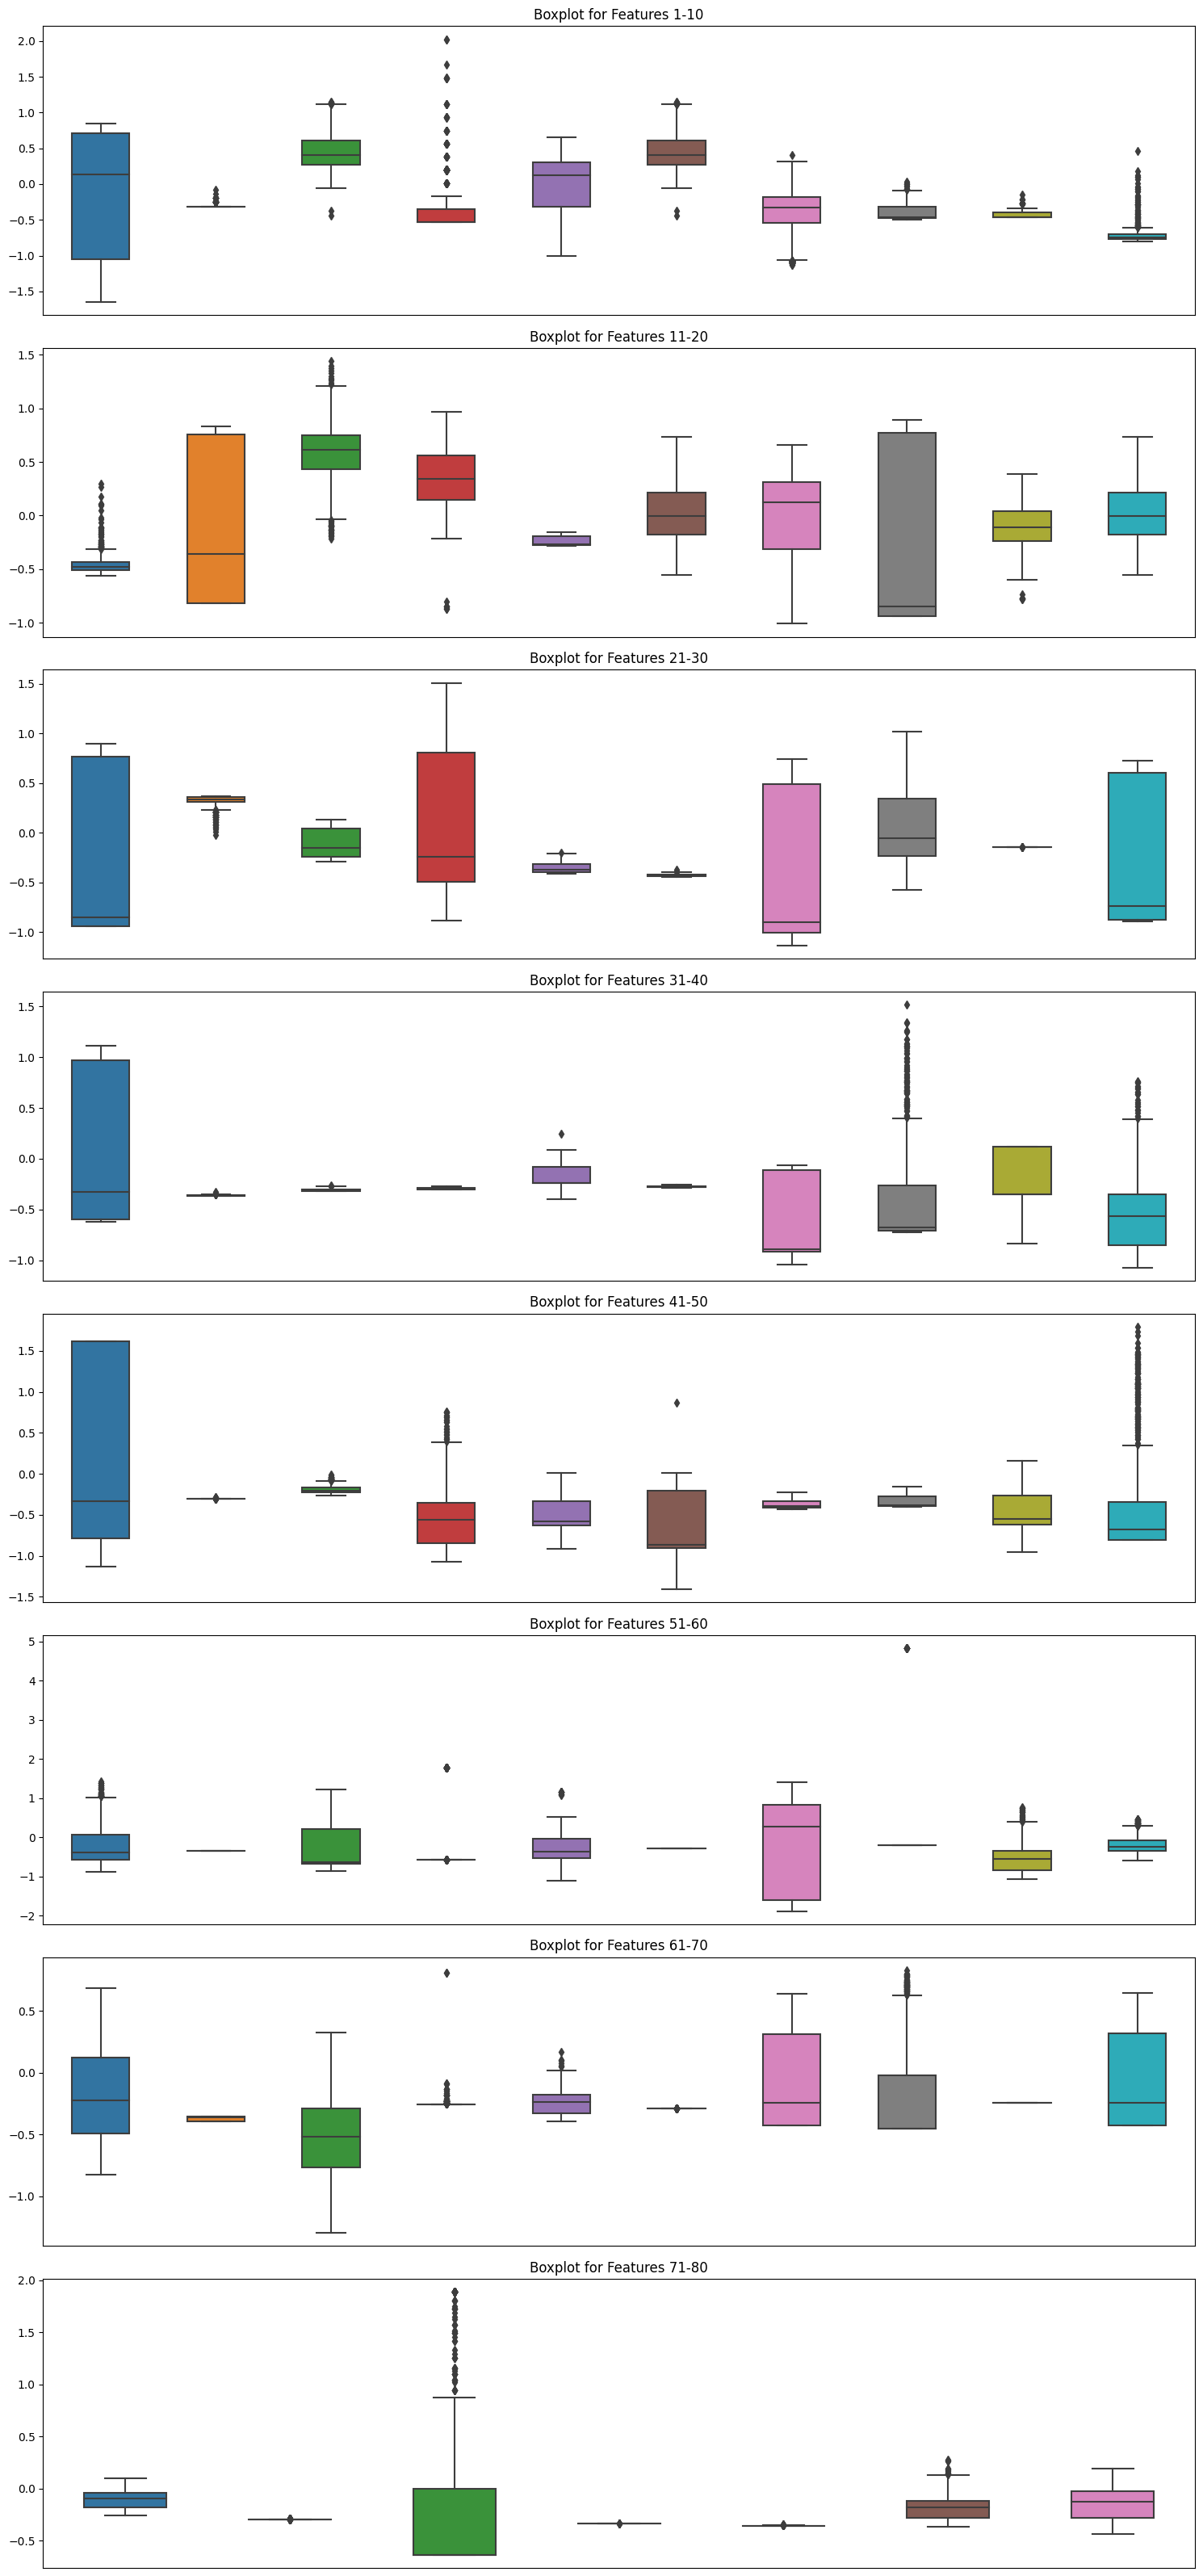

In [92]:
num_features = len(dfout.columns[:-1])
num_plots = 10

num_subplots = num_features // num_plots + (num_features % num_plots > 0)

plt.figure(figsize=(15, 4 * num_subplots))

for i in range(num_subplots):
    start_idx = i * num_plots
    end_idx = (i + 1) * num_plots

    plt.subplot(num_subplots, 1, i + 1)

    sns.boxplot(data=dfout.iloc[:, start_idx:end_idx], width=0.5)

    plt.xticks([])
    plt.title(f'Boxplot for Features {start_idx + 1}-{end_idx}')

plt.tight_layout()
plt.show()

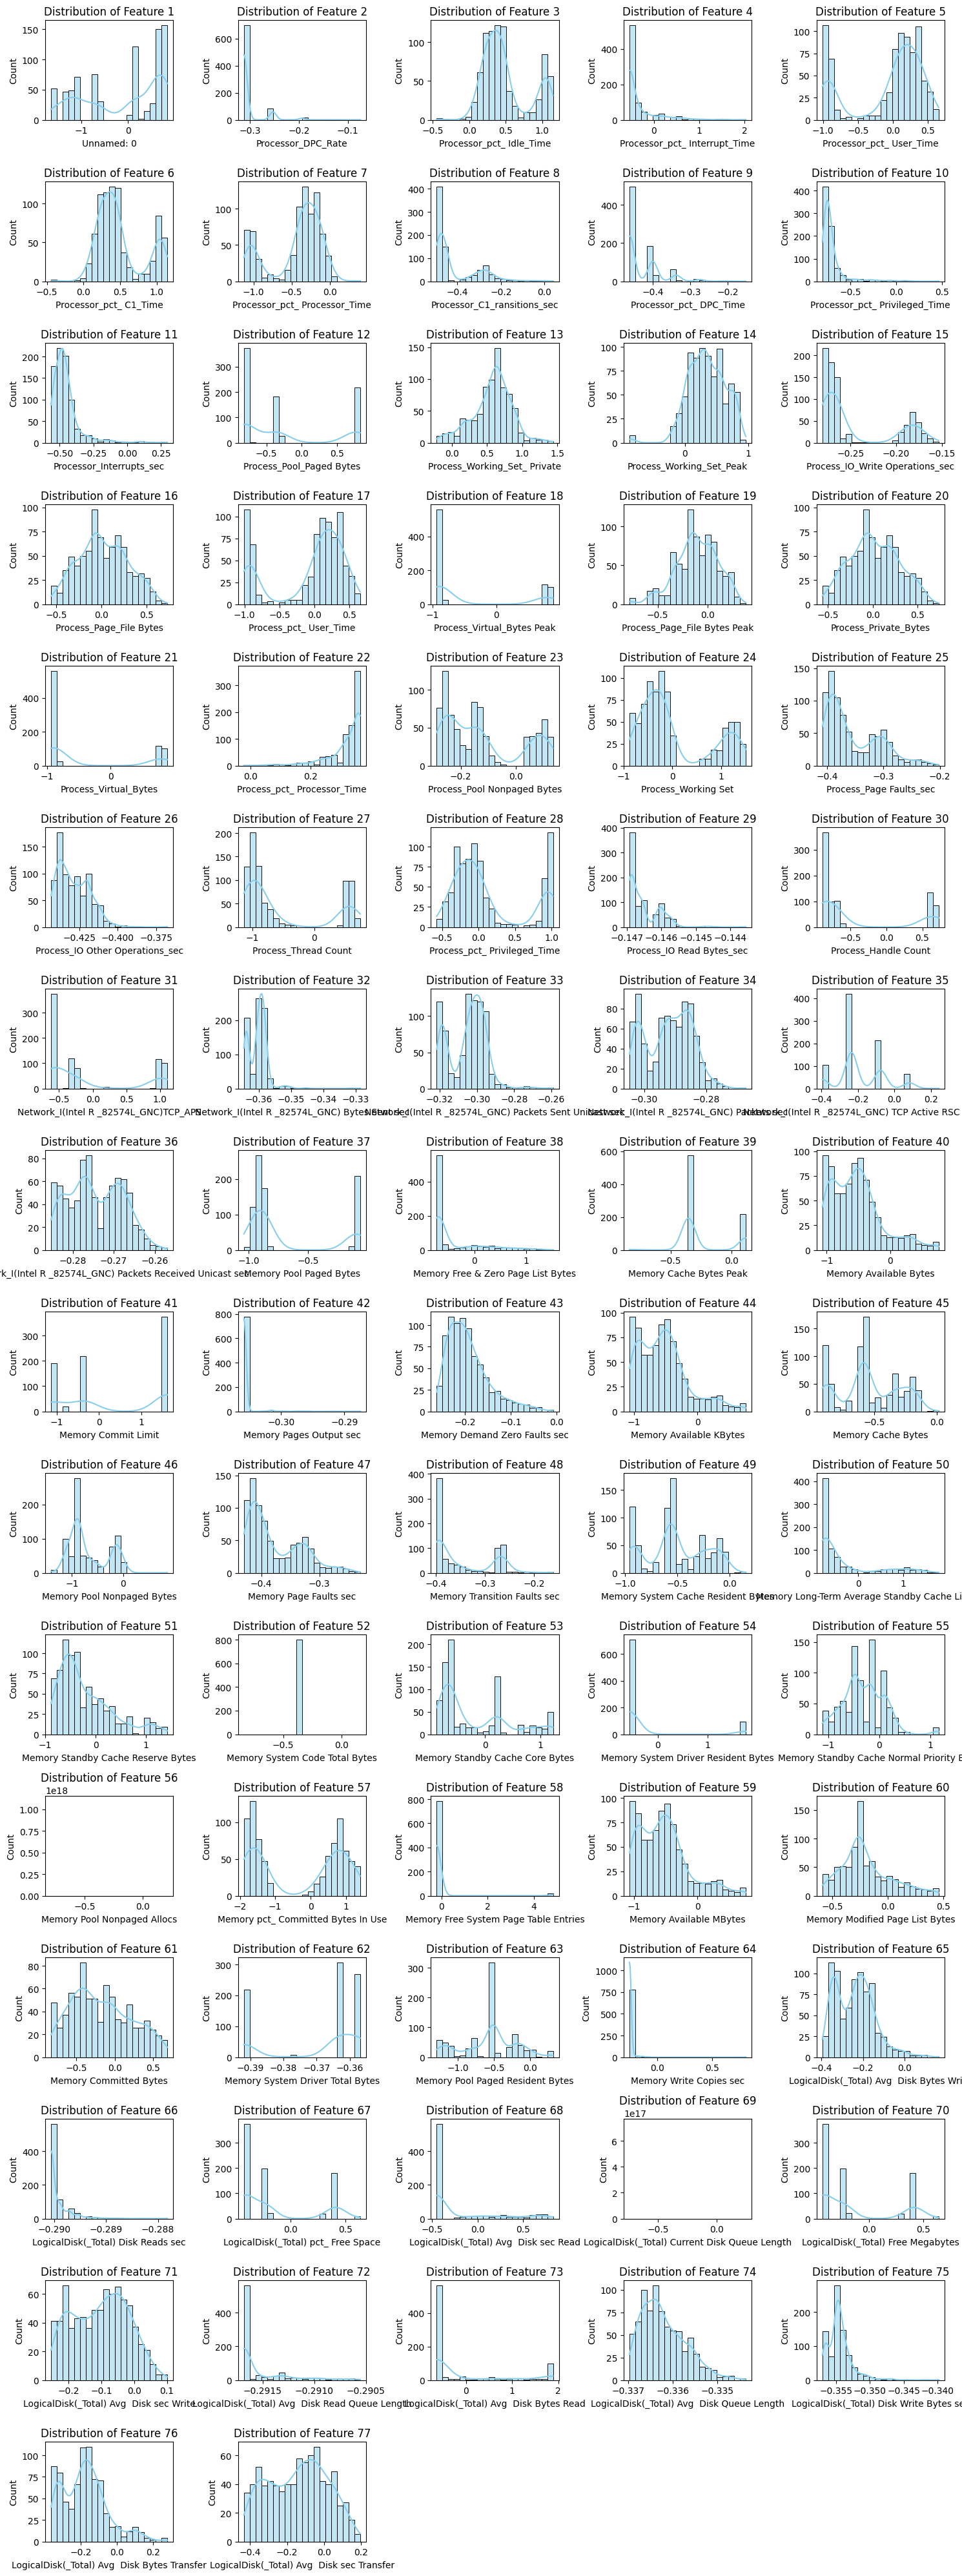

In [93]:
num_features = len(dfout.columns[:-1])

plt.figure(figsize=(15, ((num_features+10)//10)*5))

for i in range(num_features):
    plt.subplot((num_features+5)//5, 5, i + 1)

    sns.histplot(dfout.iloc[:, i], kde=True, bins=20, color='skyblue')

    plt.title(f'Distribution of Feature {i + 1}')

plt.tight_layout()

plt.show()

### Handle missing values :

In [94]:
dfs.isnull().sum()

Unnamed: 0                                      0
Processor_DPC_Rate                              0
Processor_pct_ Idle_Time                        5
Processor_pct_ Interrupt_Time                   5
Processor_pct_ User_Time                        5
                                               ..
LogicalDisk(_Total) Disk Transfers sec          5
LogicalDisk(_Total) Avg  Disk Bytes Transfer    5
LogicalDisk(_Total) pct_ Disk Write Time        5
LogicalDisk(_Total) Avg  Disk sec Transfer      5
type                                            0
Length: 106, dtype: int64

> ### Remark :
> As you can see, there a missing values, 1856 in total, That we have to handle.

In [95]:
dfs.isnull().sum().sum()

1851

#### Impute with the median value:

In [96]:
from sklearn.impute import SimpleImputer

In [97]:
imputer = SimpleImputer(strategy='median')

In [98]:
data = pd.DataFrame(imputer.fit_transform(dfs[dfs.columns[:-1]]), columns=dfs.columns[:-1])

<Axes: >

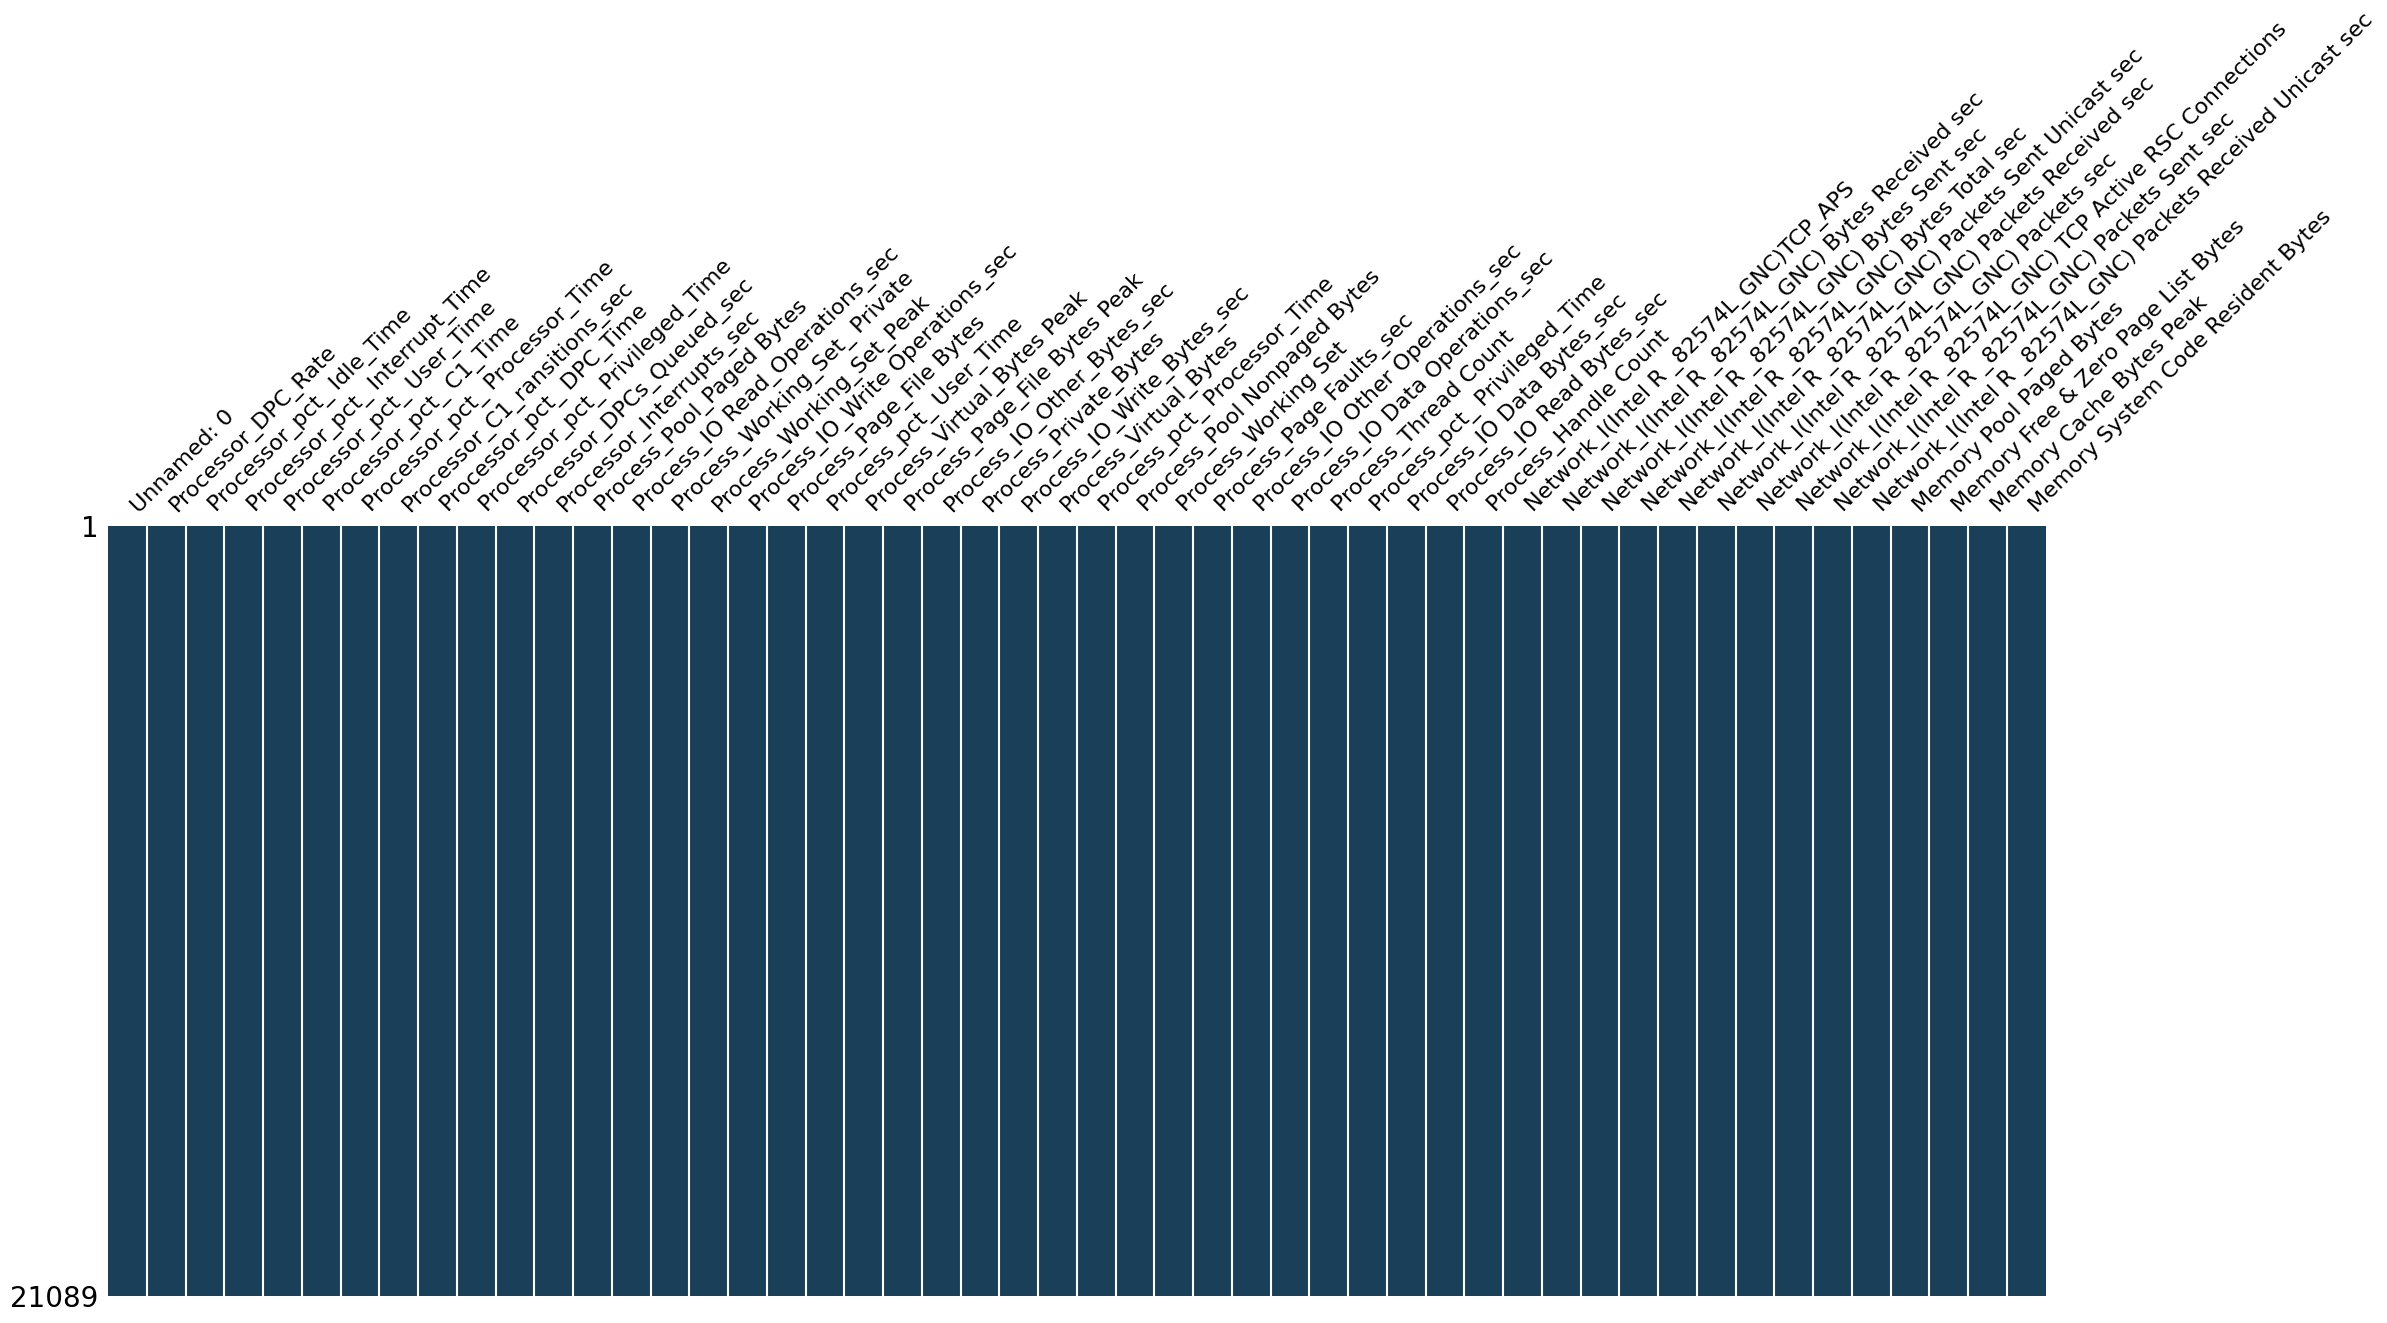

In [99]:
msno.matrix(data.iloc[:, 0:50], sparkline=False, color=(0.1, 0.25, 0.35))

We can see clearly that the missing values has been handled.

## Feature Engineering

### Dimentinality reduction using PCA :

In [100]:
from sklearn.decomposition import PCA

In [101]:
data.shape

(21089, 105)

In [102]:
pca=PCA(n_components=105)

In [103]:
pca.fit(data)

PCA(n_components=105)

In [104]:
dataWithPCA = pca.transform(data)

In [105]:
dataWithPCA

array([[-3.52920256e+00,  3.07532872e+00,  5.43597694e+00, ...,
        -1.73804503e-15, -6.07053545e-16, -9.36081361e-16],
       [-1.27860745e+00,  2.12168511e+00,  8.87394091e+00, ...,
        -6.85577643e-17, -3.29662728e-16, -1.28853371e-15],
       [-2.16057214e+00,  1.16987134e+00,  7.55505476e+00, ...,
        -5.93236183e-16, -1.55771812e-17, -8.32296969e-16],
       ...,
       [-1.71750626e+00,  6.49256592e-01,  6.32683611e+00, ...,
         4.56428315e-16, -3.39734172e-17,  2.55346171e-16],
       [-1.44552592e+00,  3.51429569e-01,  6.25457289e+00, ...,
         4.63731112e-16, -5.06883681e-16,  2.99179307e-17],
       [-2.39476696e-01,  8.12779692e-01,  5.67439577e+00, ...,
         6.82381482e-16,  2.70291570e-16,  3.14455411e-16]])

In [106]:
pca.explained_variance_ratio_

array([2.14348266e-01, 1.39918870e-01, 9.85556459e-02, 6.87693272e-02,
       5.82722561e-02, 3.33238066e-02, 2.94644672e-02, 2.78839278e-02,
       2.45288254e-02, 2.16843424e-02, 1.95918389e-02, 1.81101323e-02,
       1.54899395e-02, 1.44129344e-02, 1.38017822e-02, 1.24548165e-02,
       1.08651046e-02, 9.69860173e-03, 9.47362119e-03, 9.27075583e-03,
       8.90454018e-03, 8.72496001e-03, 8.44944963e-03, 7.93065754e-03,
       7.73306089e-03, 7.71198610e-03, 6.95488986e-03, 6.32791305e-03,
       5.64456890e-03, 5.45612748e-03, 5.13604075e-03, 4.78339047e-03,
       4.53127733e-03, 4.19747631e-03, 4.06477246e-03, 3.85173117e-03,
       3.71321314e-03, 3.39037121e-03, 3.17903052e-03, 3.06858053e-03,
       2.95360281e-03, 2.77770520e-03, 2.71665172e-03, 2.42001576e-03,
       2.20372041e-03, 1.99338266e-03, 1.92786826e-03, 1.92204771e-03,
       1.67684169e-03, 1.56248138e-03, 1.39625540e-03, 1.30067242e-03,
       1.24637743e-03, 1.09556477e-03, 9.77477574e-04, 9.08806788e-04,
      

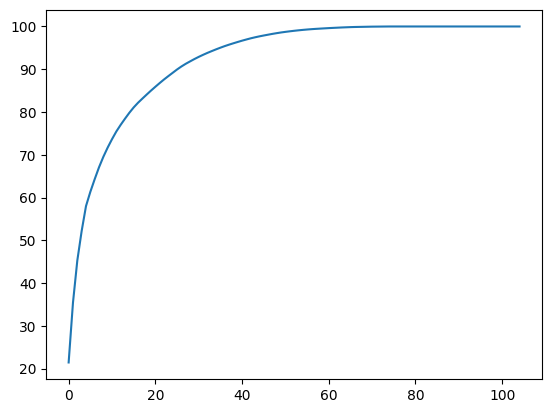

In [107]:
plt.plot(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))

In [108]:
com = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [173]:
com

array([ 21.43,  35.42,  45.28,  52.16,  57.99,  61.32,  64.27,  67.06,
        69.51,  71.68,  73.64,  75.45,  77.  ,  78.44,  79.82,  81.07,
        82.16,  83.13,  84.08,  85.01,  85.9 ,  86.77,  87.61,  88.4 ,
        89.17,  89.94,  90.64,  91.27,  91.83,  92.38,  92.89,  93.37,
        93.82,  94.24,  94.65,  95.04,  95.41,  95.75,  96.07,  96.38,
        96.68,  96.96,  97.23,  97.47,  97.69,  97.89,  98.08,  98.27,
        98.44,  98.6 ,  98.74,  98.87,  98.99,  99.1 ,  99.2 ,  99.29,
        99.37,  99.44,  99.5 ,  99.56,  99.62,  99.67,  99.72,  99.77,
        99.81,  99.85,  99.88,  99.9 ,  99.92,  99.94,  99.96,  99.97,
        99.98,  99.99, 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  ])

In [109]:
np.where(com<=98)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),)

In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
encoder = LabelEncoder()

In [112]:
typeEncoded = encoder.fit_transform(dfs["type"].to_numpy())

In [113]:
dataWithPCA.shape

(21089, 105)

### Umbalanced Dataset :

In [114]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

In [115]:
X_train, X_test, y_train, y_test = train_test_split(dataWithPCA, typeEncoded, test_size=0.2)

In [116]:
smote = SMOTE()

In [117]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [118]:
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

### Feature selection :

In [119]:
from sklearn.feature_selection import mutual_info_classif

In [120]:
importances = mutual_info_classif(X_train_smote, y_train_smote)

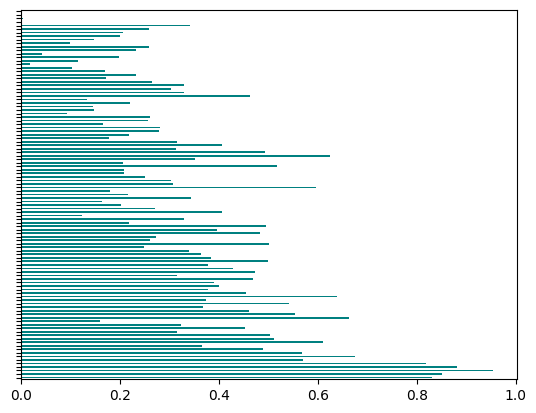

In [121]:
feat_importances = pd.Series(importances, ['']*105)
feat_importances.plot(kind='barh', color='teal')
plt.show()

In [127]:
gain_info = list(filter(lambda x : x[0] >= 0.6, map(lambda x , y : (x, y), importances, data.columns)))

In [128]:
gain_info

[(0.8319047749793138, 'Unnamed: 0'),
 (0.8512052178940026, 'Processor_DPC_Rate'),
 (0.9549434626068214, 'Processor_pct_ Idle_Time'),
 (0.8816128721174665, 'Processor_pct_ Interrupt_Time'),
 (0.8193169970728702, 'Processor_pct_ User_Time'),
 (0.6756552139808534, 'Processor_pct_ Processor_Time'),
 (0.6115604109121291, 'Processor_DPCs_Queued_sec'),
 (0.6628933982771272, 'Process_Page_File Bytes'),
 (0.6392608154506205, 'Process_IO_Write_Bytes_sec'),
 (0.6243459201093744, 'Memory Long-Term Average Standby Cache Lifetime (s)')]

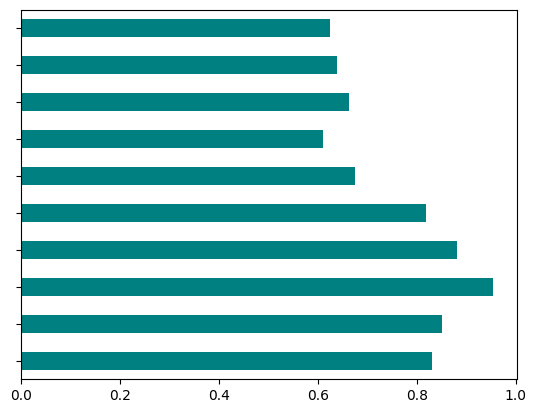

['Unnamed: 0' 'Processor_DPC_Rate' 'Processor_pct_ Idle_Time'
 'Processor_pct_ Interrupt_Time' 'Processor_pct_ User_Time'
 'Processor_pct_ Processor_Time' 'Processor_DPCs_Queued_sec'
 'Process_Page_File Bytes' 'Process_IO_Write_Bytes_sec'
 'Memory Long-Term Average Standby Cache Lifetime (s)']


In [138]:
feat_importances = pd.Series([imp[0] for imp in gain_info], ['']*10)
feat_importances.plot(kind='barh', color='teal')
plt.show()
print(np.array(list(map(lambda x : x[1], gain_info))))

In [139]:
from sklearn.feature_selection import VarianceThreshold

In [149]:
v_threshold = VarianceThreshold(threshold=0.02)

In [150]:
v_threshold.fit(X_train_smote)

VarianceThreshold(threshold=0.02)

In [172]:
v_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
model = RandomForestClassifier(random_state=40)
model.fit(X_train_smote, y_train_smote)

In [ ]:
y_pred = model.predict(X_test_smote)

In [ ]:
accuracy_score(y_pred, y_test_smote)

In [ ]:
print(classification_report(y_test_smote, y_pred))